<a href="https://colab.research.google.com/github/StefanHubner/MachineLearningEconomics/blob/main/Preliminaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise Sheet on Data Manipulation and Visualization

## Setup and Data Import

### Setup

1. Ensure that you have the following R packages installed: `foreign`, `ggplot2`, and `dplyr`. If not, install them using `install.packages()`.

### Data Loading

2. Import the economic dataset from [this link](https://raw.githubusercontent.com/StefanHubner/MachineLearningEconomics/main/data/prelim/econ_data.txt) into a dataframe named `d`. Display its first few rows using the `head()` function.

3. Similarly, import the country information dataset from [this link](https://raw.githubusercontent.com/StefanHubner/MachineLearningEconomics/main/data/prelim/country_info.txt) into a dataframe named `countryinfo`. Display the initial rows.

## Exploratory Data Analysis (EDA)

4. Filter the dataframe `d` to display rows where the country is "Austria".

5. From the same dataframe `d`, filter to display entries from the year 2006.

## Data Manipulation and Feature Engineering

6. In the dataframe `d`, create a new binary column named "highun" which should be `1` if the unemployment rate is greater than 8 and not missing. Otherwise, it should be `0`.

7. Calculate GDP per capita for each entry in dataframe `d` and store this in a new column named "gdpcap".

8. Create a subset of `d`, named `d.subset1`, containing only complete cases (no missing values).

9. Create another subset, `d.subset2`, that contains rows where the unemployment rate is not missing.

10. Rename the column "percentagewithsecondaryeduc" in dataframe `d` to "secondary".

11. Filter the data in `d` to include only entries after the year 1992 and store this subset in `d.post1992`.

12. Trim any leading or trailing spaces from the `country` column in the `countryinfo` dataframe.

13. Merge `d.post1992` with `countryinfo` based on the `country` column. Save the result in a new dataframe named `final`, ensuring that the result is ordered by country and year.

14. In the `final` dataframe, add a new binary column "eumember" that indicates if a country was a member of the EU in a given year, based on the `euadmission` column.

## Aggregation

15. Aggregate the `final` dataframe by year. For columns `pop` and `area`, calculate the sum. For columns `gdpcap`, `lfpr`, `unemplrate`, and `secondary`, calculate the mean. Store the results in a new dataframe named `aggregated`.

## Data Transformations

16. Convert the labor force participation rate (`lfpr`) column in dataframe `d` to percentages.

17. Calculate the employment rate and store it in a new column named "emplrate" in dataframe `d`.

## Visualization

18. Install and load the R packages: `ggrepel` and `maps`.

19. Using the `d.subset1` dataframe, plot the GDP per capita over the years for the countries: Austria, Germany, and the Netherlands. Differentiate each country using colors.

20. Reshape the `d.subset1` dataframe to a wide format based on the country names.

21. Create a scatter plot comparing the employment rates of Ireland and the UK. Add a linear regression line to the plot.

22. Create a map visualization showing unemployment rates of European countries. Use gradient colors to differentiate unemployment rates.


In [3]:
# use install.packages if a package doesn't exist (only the first time, e.g. install.packages("foreign"))
library(foreign)
library(ggplot2)
library(dplyr)

options(repr.plot.width = 10, repr.plot.height = 10)

d <- read.csv(url("https://raw.githubusercontent.com/StefanHubner/MachineLearningEconomics/main/data/prelim/econ_data.txt"), sep = " ")
head(d)

countryinfo <- read.csv(url("https://raw.githubusercontent.com/StefanHubner/MachineLearningEconomics/main/data/prelim/country_info.txt"), sep = " ")
head(countryinfo)

,country,year,pop,gdp,lfpr,unemplrate,secondary,highun,gdpcap,emplrate
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Albania,1993,3193894,2.372e+09,NA,NA,NA,0,742.6671,NA
2,Albania,1994,3234573,2.595e+09,NA,NA,NA,0,802.2697,NA
3,Albania,1995,3265918,2.826e+09,NA,NA,NA,0,865.3004,NA
4,Albania,1996,3303659,3.084e+09,NA,NA,NA,0,933.5104,NA
5,Albania,1997,3339329,2.769e+09,NA,NA,NA,0,829.2085,NA
6,Albania,1998,3363893,3.121e+09,NA,NA,NA,0,927.7941,NA


,country,capital,area,euadmission
,<chr>,<chr>,<int>,<int>
1,Austria,Vienna,83858,1995
2,Belgium,Brussels,30510,1957
3,Bulgaria,Sofia,110912,2007
4,Cyprus,Nicosia,9250,2004
5,Czech Republic,Prague,78866,2004
6,Denmark,Copenhagen,43094,1973


In [ ]:
head(d[d$country=="Austria",])
head(d[d$year==2006,])

,country,year,pop,gdp,lfpr,unemplrate,secondary,highun,gdpcap,emplrate
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
43,Austria,1993,7905633,1.603e+11,NA,4.0,NA,0,20276.68,NA
44,Austria,1994,7936118,1.646e+11,71.1,3.8,NA,0,20740.62,68.3982
45,Austria,1995,7948278,1.677e+11,71.4,3.9,68.9,0,21098.91,68.6154
46,Austria,1996,7959017,1.721e+11,70.8,4.3,70.5,0,21623.27,67.7556
47,Austria,1997,7968041,1.753e+11,70.9,4.4,73.1,0,22000.39,67.7804
48,Austria,1998,7976789,1.815e+11,71.0,4.5,74.1,0,22753.52,67.8050


,country,year,pop,gdp,lfpr,unemplrate,secondary,highun,gdpcap,emplrate
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
14,Albania,2006,3150884,5.034e+09,NA,NA,NA,0,1597.647,NA
28,Andorra,2006,79886,NA,NA,NA,NA,0,NA,NA
42,Armenia,2006,3222594,3.860e+09,NA,NA,NA,0,1197.793,NA
56,Austria,2006,8282424,2.152e+11,73.7,4.7,80.3,0,25982.732,70.2361
70,Azerbaijan,2006,8484550,1.335e+10,NA,NA,NA,0,1573.448,NA
84,Belarus,2006,9732501,2.011e+10,NA,NA,NA,0,2066.273,NA


In [ ]:
# new variable
d["highun"] <- as.double(d$unemplrate > 8 & !is.na(d$unemplrate))
d["gdpcap"] <- d$gdp / d$pop

# keep, drop
d.subset1 <- d[complete.cases(d),]
d.subset2 <- d[!is.na(d$unemplrate),]

# rename
names(d)[names(d)=="percentagewithsecondaryeduc"] <- "secondary"

# modified dataset
d.post1992 <- d[d$year>1992,]

# merge the two datasets
countryinfo$country <- trimws(countryinfo$country)
final <- left_join(d.post1992, countryinfo, by = "country")

# order by country and year
final <- final[order(final$country, final$year), ]

# dummy variable (1 if in eu in a given year)
final["eumember"] <- final$year >= final$euadmission
head(final[final$country=="Malta",])

,country,year,pop,gdp,lfpr,unemplrate,secondary,highun,gdpcap,emplrate,capital,area,euadmission,eumember
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<lgl>
393,Malta,1993,364704,2.766e+09,NA,NA,NA,0,7584.233,NA,Valletta,316,2004,FALSE
394,Malta,1994,367941,2.926e+09,NA,NA,NA,0,7952.362,NA,Valletta,316,2004,FALSE
395,Malta,1995,370433,3.107e+09,NA,NA,NA,0,8387.482,NA,Valletta,316,2004,FALSE
396,Malta,1996,372687,3.231e+09,NA,NA,NA,0,8669.473,NA,Valletta,316,2004,FALSE
397,Malta,1997,375236,3.386e+09,NA,NA,NA,0,9023.654,NA,Valletta,316,2004,FALSE
398,Malta,1998,377516,3.504e+09,NA,NA,NA,0,9281.726,NA,Valletta,316,2004,FALSE


In [ ]:
aggregated.sums <- aggregate(final[c("pop", "area")], by=list(final$year), FUN=sum, na.rm = TRUE)
aggregated.means <- aggregate(final[c("gdpcap", "lfpr", "unemplrate", "secondary")], by=list(final$year), FUN=mean, na.rm = TRUE)

aggregated <- merge(aggregated.sums, aggregated.means) # weighted mean: easiest to pre-weight columns, then use sum or mean
names(aggregated)[names(aggregated)=="Group.1"] <- "year"
# generate, replace new variables (labour force participation rate)
d$lfpr <- d$lfpr * 100
d["emplrate"] <- (100 - d$unemplrate) * d$lfpr / 100
summary(d$lfpr)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   5020    6385    6960    6903    7295    8710     293 

In [ ]:
install.packages(c("ggrepel", "maps"))
library(ggrepel)
library(maps)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



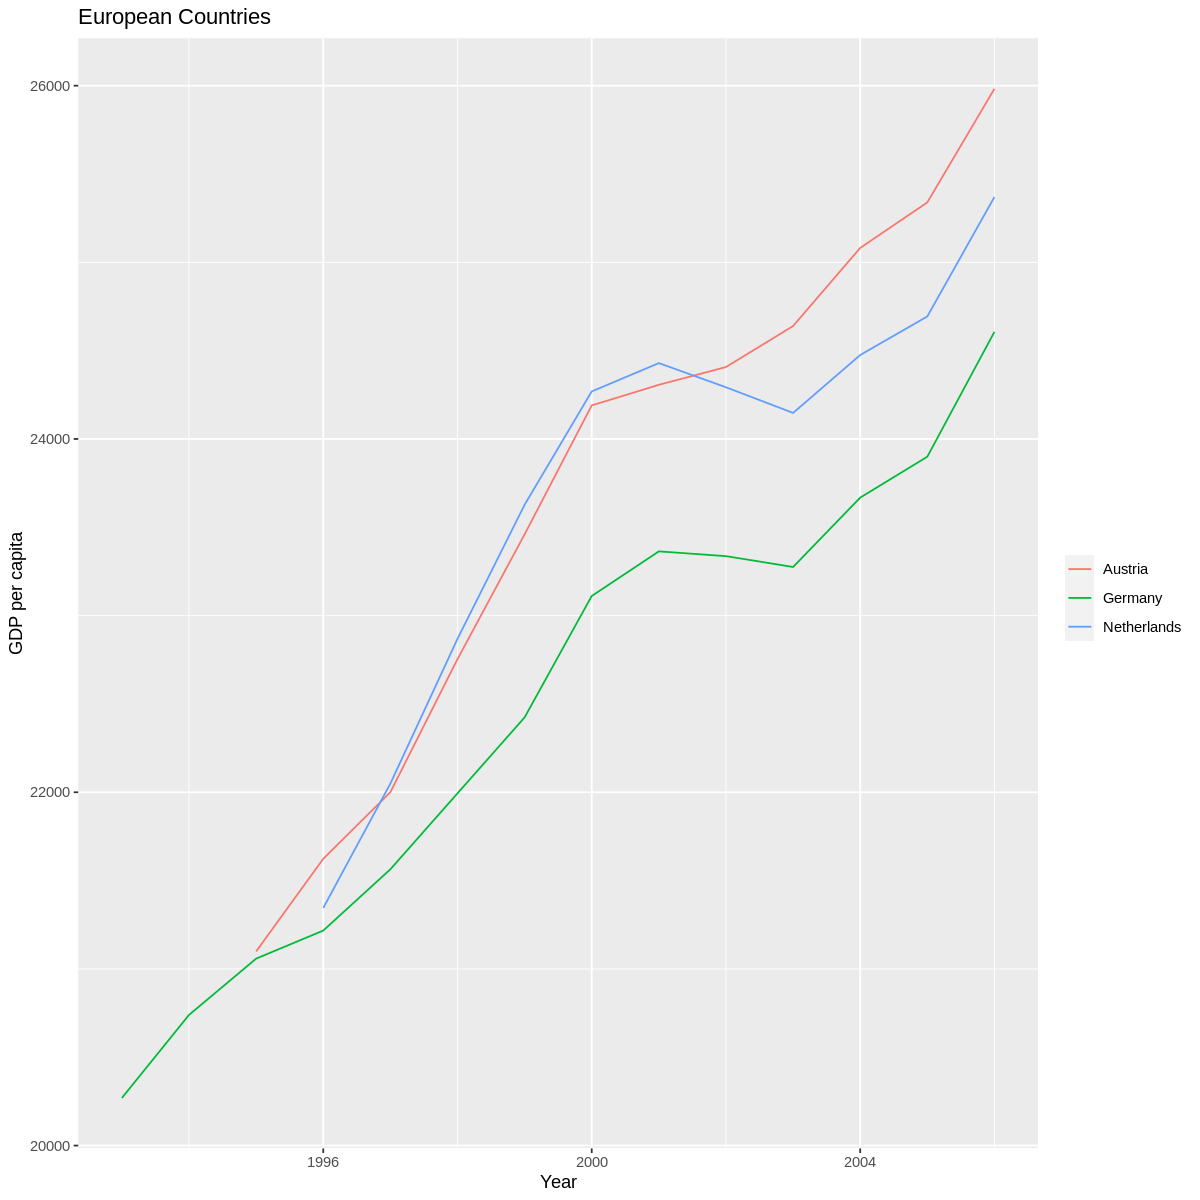

In [ ]:
# plot for some countries
ggplot(d.subset1[d.subset1$country %in% c("Austria", "Germany", "Netherlands"),], aes(x=year, y=gdpcap)) +
  geom_line(aes(group=country, color=country)) +
  labs(title = "European Countries", x = "Year", y = "GDP per capita") +
  theme(legend.title=element_blank())

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


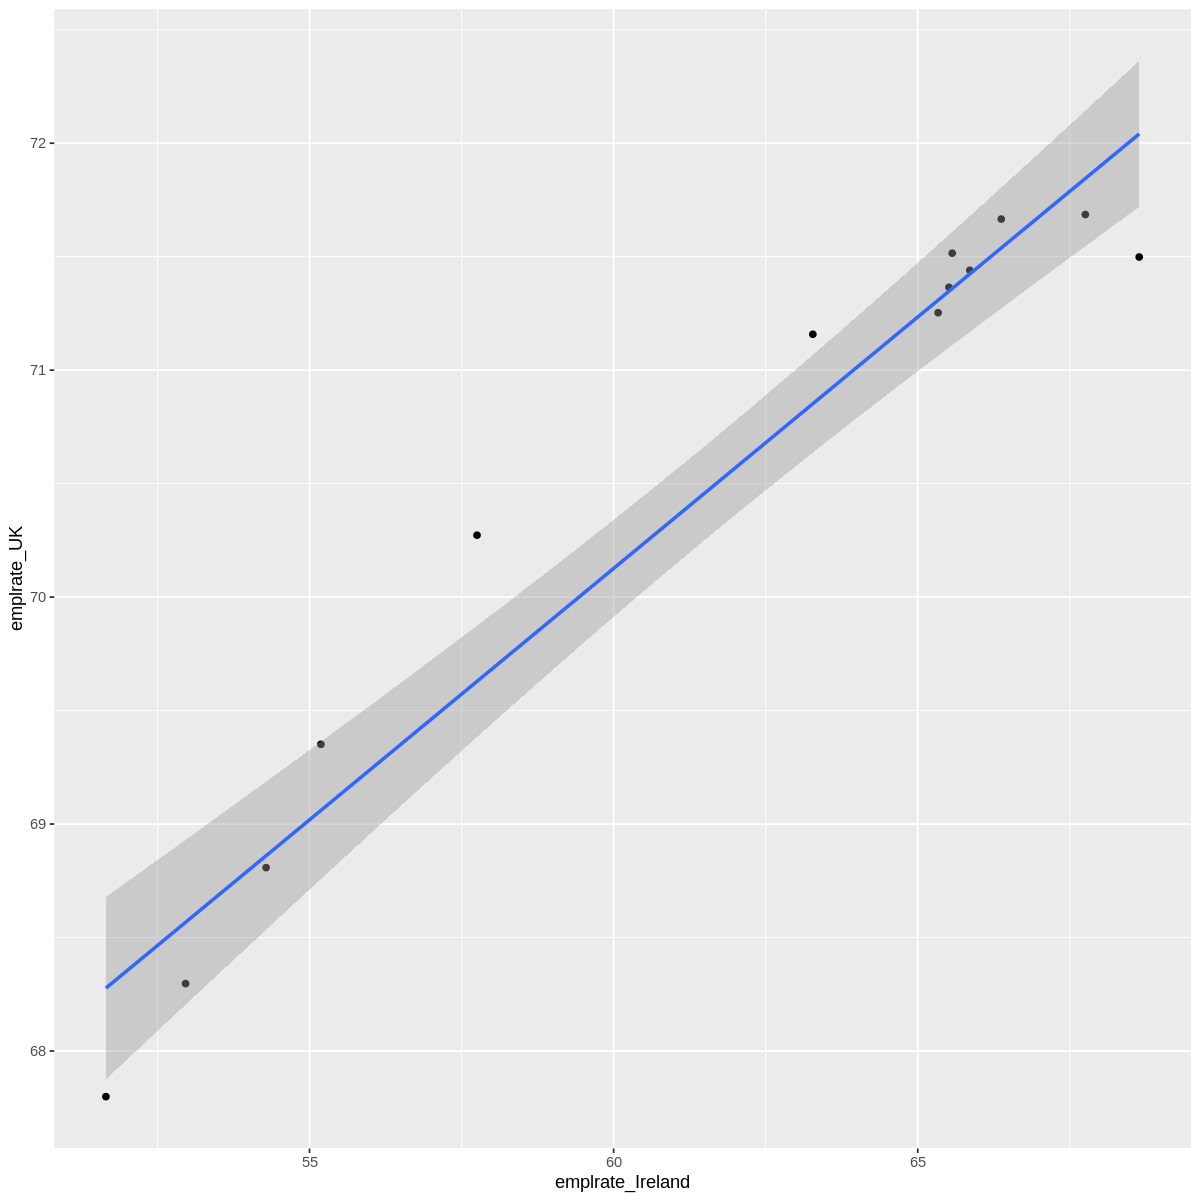

In [ ]:
# some more plotting
wide <- reshape(d.subset1, idvar = "year", timevar = "country", direction = "wide", sep="_")
p1 <- ggplot(wide, aes(x=emplrate_Ireland, y=emplrate_UK)) +
  geom_point() +
  geom_smooth(method=lm)

p1

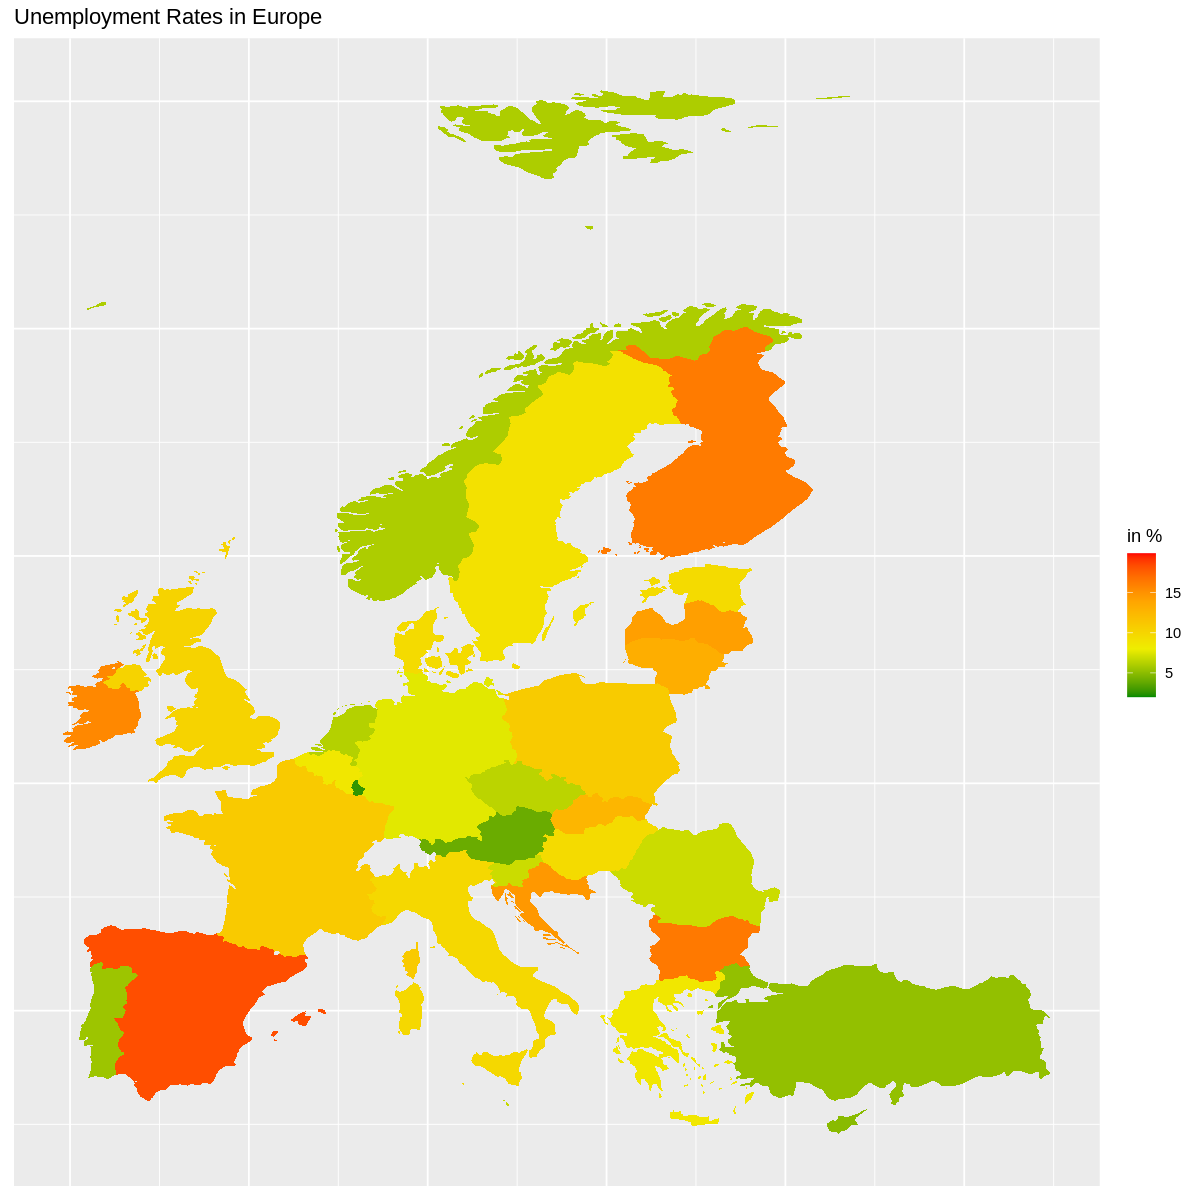

In [ ]:
# plot it on a map
df.map <- map_data('world')
df.map["country"] <- df.map["region"]
d.ext <- left_join(d.subset2, df.map, by="country", relationship = "many-to-many")
p2 <- ggplot(d.ext, aes(x = long, y = lat, group = group)) +
  geom_polygon(aes(fill = unemplrate)) +
  labs(title = 'Unemployment Rates in Europe', fill = 'in %') +
  scale_fill_gradientn(colors = c('green4', 'yellow2', 'orange', 'red')) +
  theme(axis.title = element_blank(), axis.text = element_blank(), axis.ticks = element_blank())

p2